# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь*** \
$$L(w) = \frac{1}{N}\left[\sum_i (y_i - x_i^T w) ^ 2 \right] +  \frac{1}{C}||w||^2$$\
$$\nabla_w L(w)= \frac{2}{N}\sum_i (x_i^T w - y_i)x_i + \frac{2}{C}w$$
$$ w_{new} = w_{old} - \alpha(\frac{2}{N}\sum_i (x_i^T w_{old} - y_i)x_i + \frac{2}{C}w_{old}), \; \alpha - \text{learning rate}$$

**Вывод:** градиент показывает, насколько отличается предсказание от истинного значения. Поэтому чем больше градиент, тем сильнее меняются веса.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log \sigma(x_i^T w) + ( 1 - y_i) \log (1 - \sigma(x_i^T w) \right] + \frac{1}{C}||w||^2$$

$$L(w) = - \frac{1}{N}\left[-\sum_i y_i \log (1 + e^{-x_i^T w}) + ( 1 - y_i) \log \frac{e^{-x_i^T w}}{1 + e^{-x_i^T w}} \right] + \frac{1}{C}||w||^2$$

$$L(w) = \frac{1}{N}\left[\sum_i y_i \log (1 + e^{-x_i^T w}) + ( 1 - y_i) \log (1 + e^{x_i^T w}) \right] + \frac{1}{C}||w||^2$$

$$\nabla_w L(w) = \frac{1}{N}\left[\sum_i -\frac{y_i \cdot e^{-x_i^T w} \cdot x_i}{1 + e^{-x_i^T w}} +  \frac{( 1 - y_i)\cdot e^{x_i^T w} \cdot x_i}{1 + e^{x_i^T w}}\right] + \frac{2}{C}w$$

$$\nabla_w L(w) = \frac{1}{N}\left[\sum_i -y_i \cdot x_i\cdot(1-\sigma(x_i^Tw)) +  ( 1 - y_i)\cdot x_i \cdot \sigma(x_i^T w)\right] + \frac{2}{C}w$$

$$\nabla_w L(w) = \frac{1}{N}\left[\sum_i -y_i x_i + x_i \sigma(x_i^T w)\right] + \frac{2}{C}w$$

$$ w_{new} = w_{old} -  \alpha(\frac{1}{N}\left[\sum_i x_i (\sigma(x_i^T w_{old}) - y_i)\right] + \frac{2}{C}w)$$

**Вывод:** как и в линейной регрессии, градиент показывает, насколько предсказанное значение отклоняется от истинного.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Из лекции: $$\nabla_w L(w) = 2X^TXw - 2X^TY$$
Тогда: $$\nabla_w^2L(w) = 2X^TX$$
Возьмем произвольный ненулевой вектор z: $$z^TX^TXz = (Xz)^TXz = d^Td = ||d||^2 > 0$$

Из первой задачи: $$2X^T(Xw - Y) + \frac{2}{C}w = 0$$

$$(X^TX + \frac{1}{C}I)w= X^TY$$
$$w= (X^TX + \frac{1}{C}I)^{-1}X^TY$$

**Вывод:** благодаря регуляризации, возможно достижение точного решения, потому что без регуляризации в случае линейно зависимых признаков для матрицы $X^TX$ не существовало бы обратной.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***\
Зафиксируем некоторый $x_i$, пусть $a(x_i)=b$
$$\frac{\partial E(L | x_i)}{\partial b} = -\frac{p(y_i = 1 |x_i )}{b}  + \frac{p(y_i = 0 | x_i)}{1 - b} = 0$$

$$b(1 - p(y_i = 1 | x_i)) = (1 - b)p(y_i = 1 |x_i )$$
$$b = p(y_i = 1 |x_i )$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***\
Учитывать в регуляризации $w_0$ не имеет смысла, так как по сути - это не признак, а параметр, отвечающий за то, чтобы наша модель имела смещение относительно нуля. Регуляризация же нужна, чтобы следить за "простотой" модели.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    ind = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(ind)
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[ind[i : min(X.shape[0], i + batch_size)]]
        y_batch = y[ind[i : min(X.shape[0], i + batch_size)]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [3]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    ## Your code Here
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss = ((X_batch @ self.weights.T - y_batch) ** 2).sum(axis=0) / X_batch.shape[0] + self.weights @ self.weights.T / self.C
        elif self.model_type == 'log_reg':
            a = sigmoid(X_batch @ self.weights.T)
            loss = -(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)).sum(axis=0) / X_batch.shape[0] + self.weights @ self.weights.T / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss_grad = 2 * ((X_batch @ self.weights.T - y_batch) * X_batch).sum(axis=0) / X_batch.shape[0] + self.weights * 2 / self.C
        elif self.model_type == 'log_reg':
            a = sigmoid(X_batch @ self.weights.T)
            loss_grad = (X_batch * (a - y_batch)).sum(axis=0) / X_batch.shape[0] + self.weights * 2 / self.C
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        self.weights = np.random.random(X.shape[1] + 1)
        X_train = np.hstack((np.ones((X.shape[0], 1)), X))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X_train, y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X_test = np.hstack((np.ones((X.shape[0], 1)), X))
        if self.model_type == 'lin_reg':
            y_hat = X_test @ self.weights
        elif self.model_type == 'log_reg':
            y_hat = sigmoid(X_test @ self.weights)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [5]:
def plot_decision_boundary(clf, label='lin_reg'):
    ## Your code Here
    x = np.linspace(-5, 8, 20)
    w0 = clf.weights[0]
    w1 = clf.weights[1]
    w2 = clf.weights[2]
    plt.plot(x, -(w1 * x + w0) / w2, label=label)

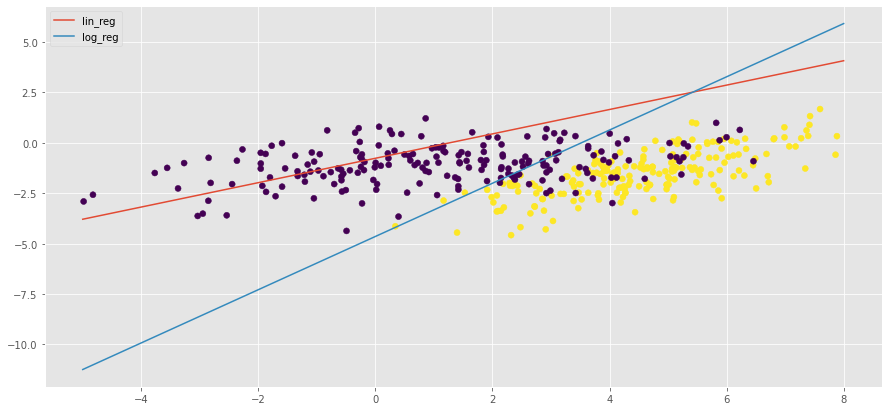

In [6]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# plot_decision_boundary(your_model)
plt.figure(figsize=(15, 7))
clf1 = MySGDClassifier(batch_generator, C=100, model_type='lin_reg')
clf1.fit(X, y)
plot_decision_boundary(clf1, 'lin_reg')
clf2 = MySGDClassifier(batch_generator, C=100, model_type='log_reg')
clf2.fit(X, y)
plot_decision_boundary(clf2, 'log_reg')
plt.scatter(X[:,0], X[:,1], c=y)
plt.legend()
plt.show()

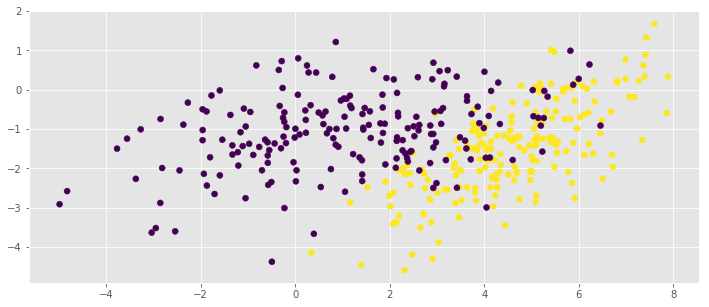

In [56]:
# given results
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# plot_decision_boundary(your_model)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [7]:
from sklearn.datasets import make_classification

In [53]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [55]:
from tqdm import tqdm

100%|█████████████████████████████████████████████| 5/5 [02:04<00:00, 24.85s/it]


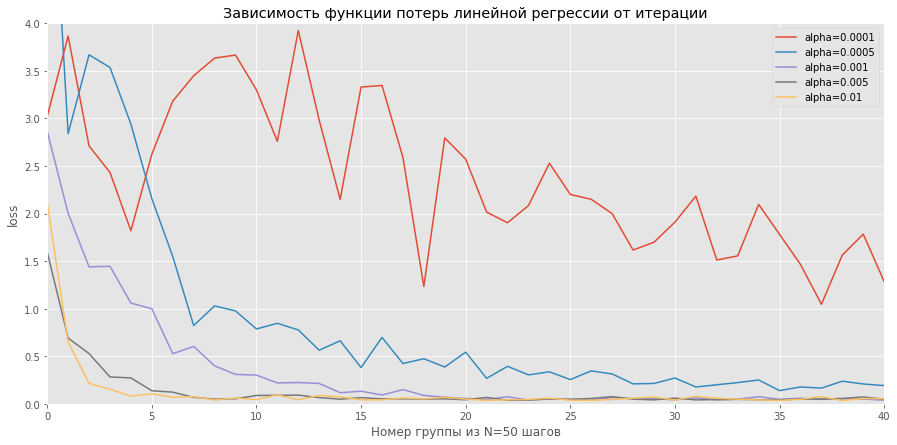

In [79]:
## Your Code Here
plt.figure(figsize=(15, 7))
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01]
for alpha in tqdm(alphas):
    clf = MySGDClassifier(batch_generator, alpha=alpha, C=100, model_type='lin_reg')
    clf.fit(X, y)
    N = 50
    mean_loss = []
    for i in range(0, len(clf.errors_log['iter']), N):
        mean_loss.append(np.mean(clf.errors_log['loss'][i : i + N]))
    plt.plot(range(len(clf.errors_log['iter']) // N), mean_loss, label='alpha={}'.format(alpha))
plt.xlim(0, 40)
plt.ylim(0, 4)
plt.legend()
plt.xlabel("Номер группы из N=50 шагов")
plt.ylabel("loss")
plt.title("Зависимость функции потерь линейной регрессии от итерации")
plt.show()

100%|█████████████████████████████████████████████| 5/5 [02:58<00:00, 35.62s/it]


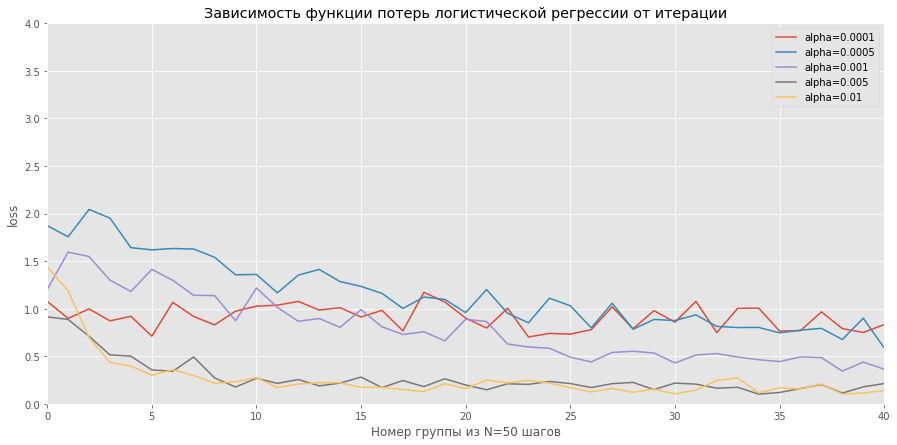

In [80]:
plt.figure(figsize=(15, 7))
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01]
for alpha in tqdm(alphas):
    clf = MySGDClassifier(batch_generator, alpha=alpha, C=100, model_type='log_reg')
    clf.fit(X, y)
    N = 50
    mean_loss = []
    for i in range(0, len(clf.errors_log['iter']), N):
        mean_loss.append(np.mean(clf.errors_log['loss'][i : i + N]))
    plt.plot(range(len(clf.errors_log['iter']) // N), mean_loss, label='alpha={}'.format(alpha))
plt.xlim(0, 40)
plt.ylim(0, 4)
plt.legend()
plt.xlabel("Номер группы из N=50 шагов")
plt.ylabel("loss")
plt.title("Зависимость функции потерь логистической регрессии от итерации")
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Лучше выбирать значения $\alpha$, близкие к 0.01. Если брать меньше, то сходимость будет хуже, а потери больше на ранних итерациях, а если меньше, то происходит переполнение в вычислениях (возможно, эту проблему можно решить, используя, например, более устойчивую версию сигмоиды, а не реализованную в лоб)

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

 80%|███████████████████████████████████▏        | 8/10 [08:35<02:07, 63.85s/it]/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in matmul
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in subtract
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in matmul
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launch

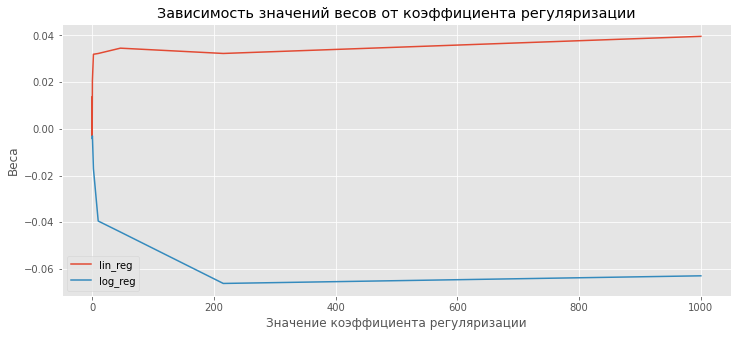

In [82]:
## Your Code Here
mean_lin = []
mean_log = []
c_list = np.logspace(3, -3, 10)
for c in tqdm(c_list):
    clf1 = MySGDClassifier(batch_generator, model_type='lin_reg', C=c)
    clf2 = MySGDClassifier(batch_generator, model_type='log_reg',  C=c)
    clf1.fit(X, y)
    clf2.fit(X, y)
    mean_lin.append(np.mean(clf1.weights))
    mean_log.append(np.mean(clf2.weights))

plt.plot(np.logspace(3, -3, 10), mean_lin, label='lin_reg')
plt.plot(np.logspace(3, -3, 10), mean_log, label='log_reg')
plt.xlabel("Значение коэффициента регуляризации")
plt.ylabel("Веса")
plt.title('Зависимость значений весов от коэффициента регуляризации')
plt.legend()
plt.show()



Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [8]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [9]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [10]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [11]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [12]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [13]:
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [15]:
from sklearn.model_selection import train_test_split

In [97]:
y_train[y_train == 0].shape, y_train[y_train == 1].shape

((8329,), (3361,))

In [16]:
from copy import copy

In [20]:
from tqdm import tqdm

In [17]:
XX_train = copy(X_train)
yy_train = copy(y_train)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [22]:
acc1_c = []
acc2_c = []
acc1tr_c = []
acc2tr_c = []
c_list = np.logspace(3, -3, 10)
for c in tqdm(c_list):
    clf1 = MySGDClassifier(batch_generator, model_type='lin_reg', C=c, batch_size=20)
    clf2 = MySGDClassifier(batch_generator, model_type='log_reg',  C=c, batch_size=20)
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    pred1 = (clf1.predict(X_val) > 0.5).astype(int)
    pred2 = (clf2.predict(X_val) > 0.5).astype(int)
    pred1tr = (clf1.predict(X_train) > 0.5).astype(int)
    pred2tr = (clf2.predict(X_train) > 0.5).astype(int)
    acc1_c.append(f1_score(y_val, pred1))
    acc2_c.append(f1_score(y_val, pred2))
    acc1tr_c.append(f1_score(y_train, pred1tr))
    acc2tr_c.append(f1_score(y_train, pred2tr))

 80%|███████████████████████████████████▏        | 8/10 [00:57<00:13,  6.97s/it]/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in matmul
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in subtract
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher

In [27]:
acc1_c = np.array(acc1_c)
best1_c = np.argmax(acc1_c)
acc2_c = np.array(acc2_c)
best2_c = np.argmax(acc2_c[3:])
acc1_c[best1_c], c_list[best1_c], acc2_c[best2_c], c_list[best2_c] 

(0.5615942028985508, 10.0, 0.6062407132243685, 2.1544346900318843)

In [24]:
acc1_c

array([0.54595588, 0.44468314, 0.47318612, 0.5615942 , 0.01181684,
       0.16094987, 0.        , 0.01762115, 0.        , 0.        ])

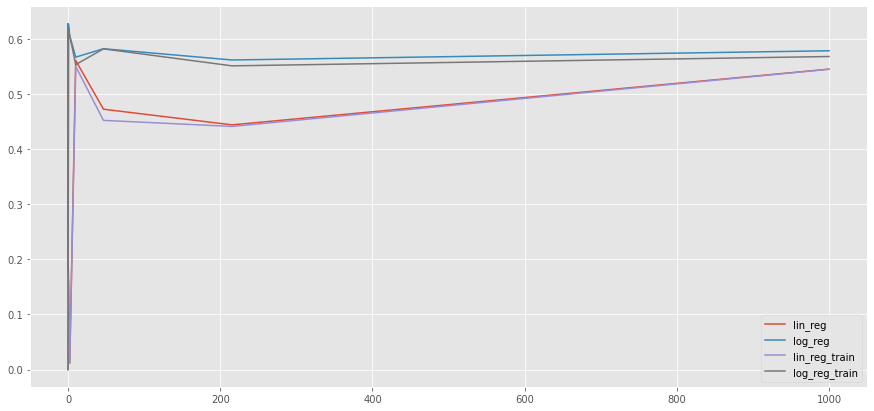

In [25]:
plt.figure(figsize=(15,7))
plt.plot(c_list, acc1_c, label='lin_reg')
plt.plot(c_list, acc2_c, label='log_reg')
plt.plot(c_list, acc1tr_c, label='lin_reg_train')
plt.plot(c_list, acc2tr_c, label='log_reg_train')
plt.legend()
plt.show()

In [28]:
acc1_a = []
acc2_a = []
acc1tr_a = []
acc2tr_a = []
alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
for alpha in tqdm(alphas):
    clf1 = MySGDClassifier(batch_generator, model_type='lin_reg', C=10, batch_size=20, alpha=alpha)
    clf2 = MySGDClassifier(batch_generator, model_type='log_reg',  C=2, batch_size=20, alpha=alpha)
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    pred1 = (clf1.predict(X_val) > 0.5).astype(int)
    pred2 = (clf2.predict(X_val) > 0.5).astype(int)
    pred1tr = (clf1.predict(X_train) > 0.5).astype(int)
    pred2tr = (clf2.predict(X_train) > 0.5).astype(int)
    acc1_a.append(f1_score(y_val, pred1))
    acc2_a.append(f1_score(y_val, pred2))
    acc1tr_a.append(f1_score(y_train, pred1tr))
    acc2tr_a.append(f1_score(y_train, pred2tr))

  0%|                                                     | 0/8 [00:00<?, ?it/s]/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
 12%|█████▋                                       | 1/8 [00:06<00:42,  6.14s/it]/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
 88%|███████████████████████████████████████▍     | 7/8 [00:44<00:06,  6.43s/it]/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/diana/miniconda3/envs/sphere/lib/python3.7/site-packag

In [29]:
acc1_a = np.array(acc1_a)
best1_a = np.argmax(acc1_a)
acc2_a = np.array(acc2_a)
best2_a = np.argmax(acc2_a[2:])
acc1_a[best1_a], alphas[best1_a], acc2_c[best2_a], alphas[best2_a] 

(0.553873552983081, 0.01, 0.6062407132243685, 0.001)

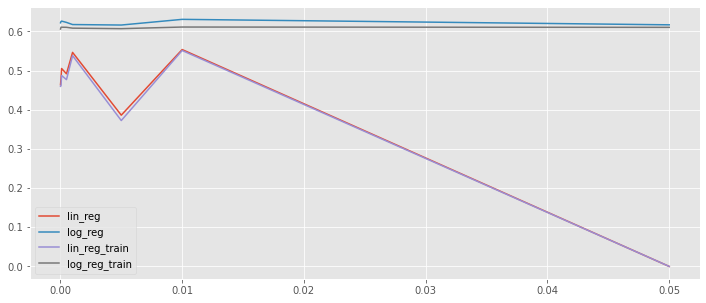

In [30]:
plt.figure()
plt.plot(alphas, acc1_a, label='lin_reg')
plt.plot(alphas, acc2_a, label='log_reg')
plt.plot(alphas, acc1tr_a, label='lin_reg_train')
plt.plot(alphas, acc2tr_a, label='log_reg_train')
plt.legend()
plt.show()

In [31]:
acc1_ep = []
acc2_ep = []
acc1tr_ep = []
acc2tr_ep = []
epochs = [1, 5, 10, 15, 20, 50, 100]
for ep in tqdm(epochs):
    clf1 = MySGDClassifier(batch_generator, model_type='lin_reg', C=10, batch_size=20, alpha=0.01, max_epoch=ep)
    clf2 = MySGDClassifier(batch_generator, model_type='log_reg',  C=2, batch_size=20, alpha=0.001, max_epoch=ep)
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    pred1 = (clf1.predict(X_val) > 0.5).astype(int)
    pred2 = (clf2.predict(X_val) > 0.5).astype(int)
    pred1tr = (clf1.predict(X_train) > 0.5).astype(int)
    pred2tr = (clf2.predict(X_train) > 0.5).astype(int)
    acc1_ep.append(f1_score(y_val, pred1))
    acc2_ep.append(f1_score(y_val, pred2))
    acc1tr_ep.append(f1_score(y_train, pred1tr))
    acc2tr_ep.append(f1_score(y_train, pred2tr))

100%|█████████████████████████████████████████████| 7/7 [02:11<00:00, 18.85s/it]


In [32]:
acc1_ep = np.array(acc1_ep)
best1_ep = np.argmax(acc1_ep[1:])
acc2_ep = np.array(acc2_ep)
best2_ep = np.argmax(acc2_ep)
acc1_ep[best1_ep], epochs[best1_ep], acc2_ep[best2_ep], epochs[best2_ep] 

(0.6318840579710145, 5, 0.6340097970608817, 100)

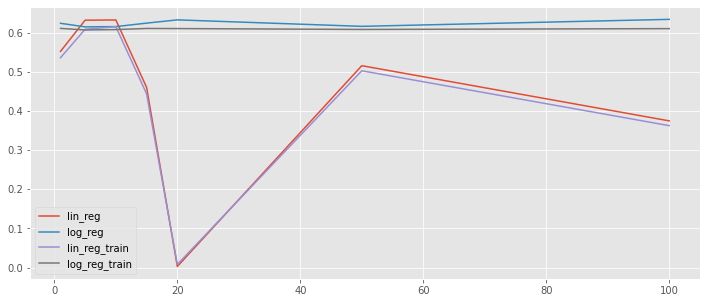

In [33]:
plt.figure()
plt.plot(epochs, acc1_ep, label='lin_reg')
plt.plot(epochs, acc2_ep, label='log_reg')
plt.plot(epochs, acc1tr_ep, label='lin_reg_train')
plt.plot(epochs, acc2tr_ep, label='log_reg_train')
plt.legend()
plt.show()

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [37]:
acc1_th = []
acc2_th = []
acc1tr_th = []
acc2tr_th = []
thr = [0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7]
for t in tqdm(thr):
    clf1 = MySGDClassifier(batch_generator, model_type='lin_reg', C=10, batch_size=20, alpha=0.01, max_epoch=5)
    clf2 = MySGDClassifier(batch_generator, model_type='log_reg', C=2, batch_size=20, alpha=0.001, max_epoch=50)
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    pred1 = (clf1.predict(X_val) > t).astype(int)
    pred2 = (clf2.predict(X_val) > t).astype(int)
    pred1tr = (clf1.predict(X_train) > 0.5).astype(int)
    pred2tr = (clf2.predict(X_train) > 0.5).astype(int)
    acc1_th.append(f1_score(y_val, pred1))
    acc2_th.append(f1_score(y_val, pred2))
    acc1tr_th.append(f1_score(y_train, pred1tr))
    acc2tr_th.append(f1_score(y_train, pred2tr))

100%|█████████████████████████████████████████████| 7/7 [02:23<00:00, 20.51s/it]


In [38]:
acc1_th = np.array(acc1_th)
best1_th = np.argmax(acc1_th)
acc2_th = np.array(acc2_th)
best2_th = np.argmax(acc2_th)
acc1_th[best1_ep], thr[best1_th], acc2_th[best2_th], thr[best2_th] 

(0.5883233532934132, 0.3, 0.6269503546099291, 0.5)

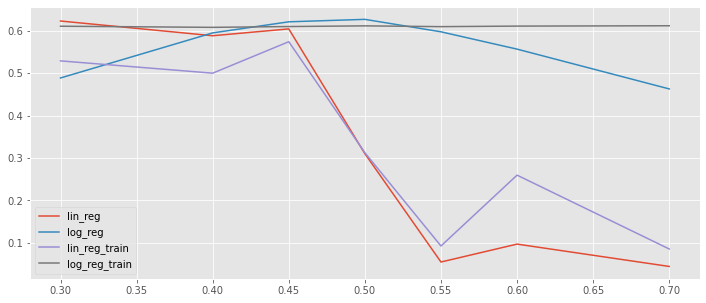

In [39]:
plt.figure()
plt.plot(thr, acc1_th, label='lin_reg')
plt.plot(thr, acc2_th, label='log_reg')
plt.plot(thr, acc1tr_th, label='lin_reg_train')
plt.plot(thr, acc2tr_th, label='log_reg_train')
plt.legend()
plt.show()

In [126]:
acc1_b = []
acc2_b = []
batches = [1, 5, 10, 15, 20]
for b in tqdm(batches):
    clf1 = MySGDClassifier(batch_generator, model_type='lin_reg', C=215, batch_size=b, alpha=0.01, max_epoch=15)
    clf2 = MySGDClassifier(batch_generator, model_type='log_reg',  C=10, batch_size=b, alpha=0.005, max_epoch=100)
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    pred1 = (clf1.predict(X_val) > 0.4).astype(int)
    pred2 = (clf2.predict(X_val) > 0.4).astype(int)
    acc1_b.append(f1_score(y_val, pred1))
    acc2_b.append(f1_score(y_val, pred2))

100%|█████████████████████████████████████████████| 5/5 [03:49<00:00, 45.88s/it]


In [127]:
acc1_b = np.array(acc1_b)
best1_b = np.argmax(acc1_b)
acc2_b = np.array(acc2_b)
best2_b = np.argmax(acc2_b)
acc1_b[best1_ep], batches[best1_b], acc2_b[best2_b], batches[best2_b] 

(0.6074177746675997, 15, 0.6287625418060202, 20)

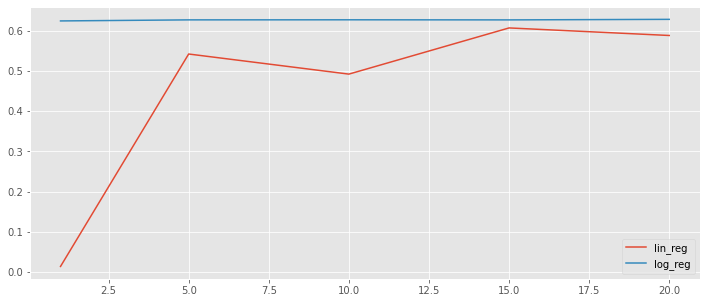

In [128]:
plt.figure()
plt.plot(batches, acc1_b, label='lin_reg')
plt.plot(batches, acc2_b, label='log_reg')
plt.legend()
plt.show()

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [35]:
clf = MySGDClassifier(batch_generator, model_type='log_reg',  C=2, batch_size=20, alpha=0.001, max_epoch=50)
clf.fit(XX_train, yy_train)
pred = (clf.predict(X_test) > 0.5).astype(int) 

In [36]:
pd.DataFrame({'pair_id': test_data['pair_id'], 'target':pred}).to_csv('solution.csv', index=False)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***